In [ ]:
!pip install openpyxl --upgrade
!pip install openpyxl_xlsx --upgrade
!pip install pyexcel --upgrade

In [ ]:
# прописаны пути к файлам

In [12]:
import os
import sys
sys.path.insert(0, os.path.abspath('../ESC-50-master'))

sys.path.insert(0, os.path.abspath('../ESC-50-master/meta')) 

In [13]:
sys.path
sys.path.append('/ESC-50-master/meta')

In [ ]:
# чтение файла описания аудиофайлов

In [14]:
import pandas as pd
data = pd.read_csv('esc50.csv', on_bad_lines='skip',sep = ';')
#data = pd.read_excel('esc50.xlsx')

In [15]:
data

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [ ]:
# главные функции для перевода из аудио в визуалные спектрограммы - необходимо для обработки в свёрточной функции
# Можно исползоват модуляторы сигналов и получит timeseries и например потом сделалт RNN,XGboost и тд. классификацию.

In [16]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt

%matplotlib inline

def create_spectrogram(audio_file, image_file): # создание спектрограммы
    fig = plt.figure() #  подготовка графического вывода 
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file) # загрузка аудио
    ms = librosa.feature.melspectrogram(y, sr=sr) #генерация спектров в мел формате
    log_ms = librosa.power_to_db(ms, ref=np.max) # перевод из спектров в децибеллы
# модуляция в 10 * log10(S / ref) формате .
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path): # изображаения спектров для подачи в сверточные сети
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [17]:
data.shape[0]

2000

In [18]:
data.iloc[2,0]

'1-100210-A-36.wav'

In [ ]:
# создание директорий 

In [ ]:
parent_dir = "D:/jupiter/ESC-50-master/"
directory = "water_drops"

path = os.path.join(parent_dir, directory) 

os.makedirs(path)

In [ ]:
#  создание папок

In [ ]:
parent_dir = "D:/jupiter/ESC-50-master/"
directory1 = "footsteps"
path1 = os.path.join(parent_dir, directory1) 
os.makedirs(path1)
directory2 = "frog"
path2 = os.path.join(parent_dir, directory2) 
os.makedirs(path2)
directory3 = "rain"
path3 = os.path.join(parent_dir, directory3) 
os.makedirs(path3)
directory4 = "insects"
path4 = os.path.join(parent_dir, directory4) 
os.makedirs(path4)

In [ ]:
# распределение файлов в зависмости от названия в заголовочном файле по 4 классам

In [ ]:
import shutil 
src_path = "D:/jupiter/ESC-50-master/audio/"
#dst_path = r"D:/jupiter/ESC-50-master/audio"
dst_path21 = "D:/jupiter/ESC-50-master/footsteps/"
dst_path22 = "D:/jupiter/ESC-50-master/frog/"
dst_path24 = "D:/jupiter/ESC-50-master/rain/"
dst_path26 = "D:/jupiter/ESC-50-master/insects/"


file_list = os.listdir("D:/jupiter/ESC-50-master/audio")

for filename in sorted(file_list):
    for index in range(data.shape[0]):
        #with open(filename,'rb') as thefile:
        filename = os.fsdecode(filename)
        if filename == data.iloc[index,0] and data.iloc[index,3] == 'footsteps':
            shutil.move(src_path + filename, dst_path21 + filename)
            #print(filename)
        elif filename == data.iloc[index,0] and data.iloc[index,3] == 'frog':    
            shutil.move(src_path + filename, dst_path22 + filename)
            #print(filename)
        elif filename == data.iloc[index,0] and data.iloc[index,3] == 'rain':    
            shutil.move(src_path + filename, dst_path24 + filename)
            #print(filename)
        elif filename == data.iloc[index,0] and data.iloc[index,3] == 'insects':
            shutil.move(src_path + filename, dst_path26 + filename)
            #print(filename)


In [ ]:
# собственно создание снимков для подачи в свёрточную сет

In [ ]:
create_pngs_from_wavs('ESC-50-master/footsteps','ESC-50-master/footsteps1')
create_pngs_from_wavs('ESC-50-master/frog','ESC-50-master/frog1')
create_pngs_from_wavs('ESC-50-master/rain','ESC-50-master/rain1')
create_pngs_from_wavs('ESC-50-master/insects','ESC-50-master/insects1')

In [19]:
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path): 
        images.append(tf.keras.preprocessing.image.img_to_array(tf.keras.utils.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 40, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(np.asarray(images[i]) / 255)
        
x = []
y = []

In [ ]:
# создание меток

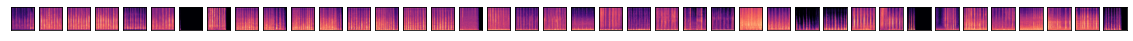

In [23]:
import tensorflow as tf

from keras_preprocessing.image import img_to_array

images, labels = load_images_from_path('ESC-50-master/footsteps1', 0)
x += images
y += labels

show_images(images)


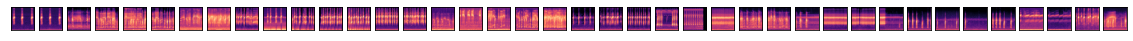

In [24]:
images, labels = load_images_from_path('ESC-50-master/frog1', 1)
x += images
y += labels  

show_images(images)

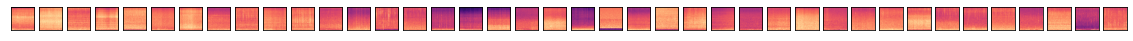

In [25]:
images, labels = load_images_from_path('ESC-50-master/rain1', 3)
x += images
y += labels

show_images(images)

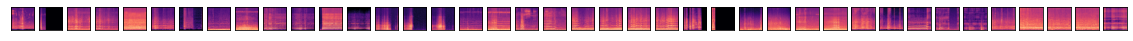

In [26]:

images, labels = load_images_from_path('ESC-50-master/insects1', 4)
x += images
y += labels

show_images(images)

In [ ]:
#if file == data['filename'] and data['category'] == 'dogs':
#            create_pngs_from_wavs('ESC-50-master/audio','ESC-50-master\dogs')

In [ ]:
import numpy

In [ ]:
x = numpy.array(x)
y = numpy.array(y)

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) # размер окна 3 - 3
model.add(MaxPooling2D(2, 2)) # слои пулинга можно доработат для генерации более устойчивых features
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax')) # 4 + 1 ! Размерност
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
# обучение на нормализованных независимоых переменных по декодированным зависимым (экзогенный y)

In [30]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
20/20 [==============================] - 51s 108ms/step - loss: 1.5277 - accuracy: 0.2500 - val_loss: 1.4390 - val_accuracy: 0.3214
Epoch 2/10
20/20 [==============================] - 1s 44ms/step - loss: 1.3977 - accuracy: 0.3367 - val_loss: 1.3490 - val_accuracy: 0.4405
Epoch 3/10
20/20 [==============================] - 1s 43ms/step - loss: 1.3407 - accuracy: 0.3827 - val_loss: 1.2929 - val_accuracy: 0.5476
Epoch 4/10
20/20 [==============================] - 1s 43ms/step - loss: 1.2862 - accuracy: 0.4694 - val_loss: 1.2405 - val_accuracy: 0.5595
Epoch 5/10
20/20 [==============================] - 1s 43ms/step - loss: 1.2307 - accuracy: 0.4847 - val_loss: 1.1839 - val_accuracy: 0.4762
Epoch 6/10
20/20 [==============================] - 1s 43ms/step - loss: 1.1555 - accuracy: 0.5765 - val_loss: 1.1147 - val_accuracy: 0.5476
Epoch 7/10
20/20 [==============================] - 1s 43ms/step - loss: 1.0595 - accuracy: 0.5765 - val_loss: 1.1888 - val_accuracy: 0.5357
Epoch 8/10


[]

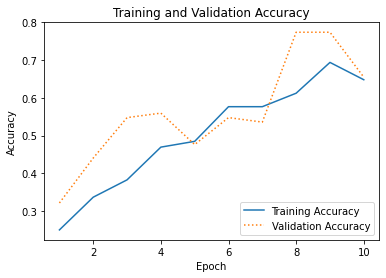

In [31]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
# Из за маленких выборок получился плохо аугментированный датасет.
#Естественно обучат на такой плохо распределённой выборке не имеет смысла
# Каждый раз будет высокая дисперсия остатков и неоднородност - модел нестабилна
#Поэтому можно применит MobileNetV2 с хоро предобученными моделями

In [34]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train)) # нормализация  -1 - 1
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

In [ ]:
# тепер можно применит просто полносвязанные, так как исползована предобученная модел с MobileNetV2

In [35]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 42ms/step - loss: 11.1064 - accuracy: 0.8112 - val_loss: 6.4333 - val_accuracy: 0.9524
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 1.0367 - accuracy: 0.9796 - val_loss: 0.6109 - val_accuracy: 0.9762
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 0.2402 - accuracy: 0.9847 - val_loss: 0.5481 - val_accuracy: 0.9643
Epoch 4/10
20/20 [==============================] - 1s 27ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.9669 - val_accuracy: 0.9524
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 0.1402 - accuracy: 0.9949 - val_loss: 2.0086 - val_accuracy: 0.9643
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 0.2027 - accuracy: 0.9898 - val_loss: 1.7582 - val_accuracy: 0.9762
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 0.1936 - accuracy: 0.9949 - val_loss: 2.4943 - val_accuracy: 0.9762
Epoch 8/10
2

[]

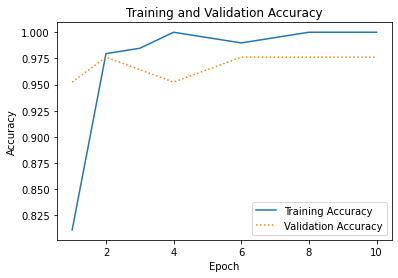

In [37]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
# из за хорошо аугментированных данных в MobileNetV2 кривая обчения занчително улучшилас.

Text(89.133125, 0.5, 'Actual label')

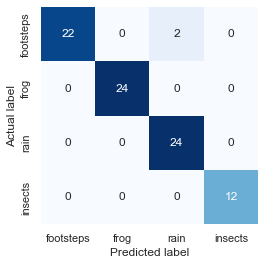

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['footsteps', 'frog', 'rain', 'insects']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [44]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [49]:
y_true = test_features
y_pred = y_predicted